# Modeling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# โหลดข้อมูลที่ clean แล้ว
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Heart-Failure-Prediction/heart_failure_clinical_records-scaled.csv') # ใช้ MinMaxScaler
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1,DEATH_EVENT_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,0,1
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1,0,1
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,0,1
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    float64
 2   ejection_fraction         299 non-null    float64
 3   platelets                 299 non-null    float64
 4   serum_creatinine          299 non-null    float64
 5   serum_sodium              299 non-null    float64
 6   time                      299 non-null    float64
 7   anaemia_1                 299 non-null    int64  
 8   diabetes_1                299 non-null    int64  
 9   high_blood_pressure_1     299 non-null    int64  
 10  sex_1                     299 non-null    int64  
 11  smoking_1                 299 non-null    int64  
 12  DEATH_EVENT_1             299 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1,DEATH_EVENT_1
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.00000
mean,0.378798,0.071299,0.364903,0.288833,0.100436,0.675012,0.449327,0.431438,0.418060,0.351171,0.648829,0.32107,0.32107
std,0.216269,0.123793,0.179316,0.118565,0.116237,0.126071,0.276207,0.496107,0.494067,0.478136,0.478136,0.46767,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.200000,0.011929,0.242424,0.227179,0.044944,0.600000,0.245552,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.363636,0.028961,0.363636,0.287186,0.067416,0.685714,0.395018,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000
75%,0.545455,0.071319,0.469697,0.337495,0.101124,0.771429,0.708185,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [6]:
# ตรวจสอบ na ในข้อมูล
df.isna().sum()

age                         0
creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
time                        0
anaemia_1                   0
diabetes_1                  0
high_blood_pressure_1       0
sex_1                       0
smoking_1                   0
DEATH_EVENT_1               0
dtype: int64

In [7]:
y = df['DEATH_EVENT_1']
X = df.drop('DEATH_EVENT_1', axis=1)

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT_1, Length: 299, dtype: int64

In [9]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1,0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.004848,0.363636,0.157474,0.067416,0.857143,0.946619,0,1,1,1,1
295,0.272727,0.229268,0.363636,0.296884,0.078652,0.742857,0.950178,0,0,0,0,0
296,0.090909,0.259888,0.696970,0.869075,0.033708,0.714286,0.975089,0,1,0,0,0
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0.982206,0,0,0,1,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=555
)

In [12]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
141,0.109091,0.034192,0.318182,0.391441,0.044944,0.771429,0.373665,1,0,0,0,0
8,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,0,0,0,0,0
6,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1,0,0,1,0
121,0.472727,0.005741,0.363636,0.165960,0.056180,0.657143,0.323843,1,1,1,0,0
98,0.363636,0.016969,0.166667,0.355073,0.078652,0.685714,0.288256,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.236364,0.087267,0.363636,0.369621,0.101124,0.685714,0.729537,1,0,0,1,1
38,0.363636,0.335928,0.242424,0.339314,0.202247,0.685714,0.092527,0,1,0,1,0
68,0.545455,0.017607,0.166667,0.265365,0.078652,0.828571,0.220641,0,0,0,0,0
33,0.181818,0.017351,0.242424,0.335677,0.078652,0.714286,0.088968,1,1,0,0,0


In [13]:
y_train.value_counts()

0    139
1     70
Name: DEATH_EVENT_1, dtype: int64

In [14]:
X_test

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
153,0.181818,0.232585,0.318182,0.288833,0.076404,0.685714,0.409253,0,1,0,1,1
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0.982206,0,0,0,1,1
165,0.727273,0.096070,0.363636,0.202328,0.089888,0.628571,0.448399,0,1,1,0,0
161,0.090909,0.013651,0.318182,0.180507,0.033708,0.742857,0.416370,1,0,0,1,1
265,0.181818,0.035085,0.318182,0.408413,0.044944,0.771429,0.839858,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.363636,0.004593,0.166667,0.226573,0.337079,0.657143,0.651246,0,0,1,1,1
114,0.363636,0.093264,0.393939,0.367196,0.078652,0.371429,0.309609,1,1,1,1,0
201,0.090909,0.036361,0.696970,0.426597,0.056180,0.657143,0.647687,0,1,1,1,0
215,0.600000,0.071319,0.318182,0.215663,0.089888,0.600000,0.679715,0,0,1,1,0


In [15]:
y_test.value_counts()

0    64
1    26
Name: DEATH_EVENT_1, dtype: int64

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.8

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        64
           1       0.63      0.73      0.68        26

    accuracy                           0.80        90
   macro avg       0.76      0.78      0.77        90
weighted avg       0.81      0.80      0.80        90



In [22]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

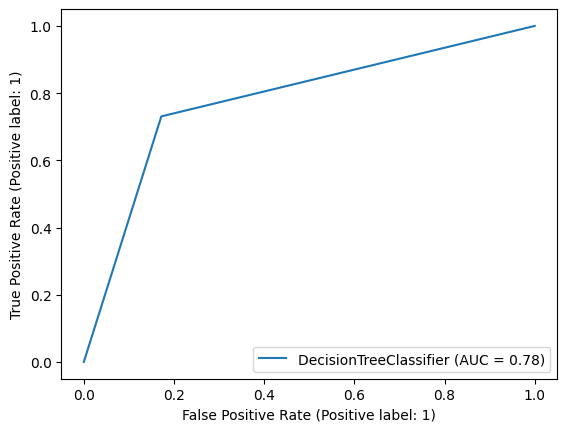

In [23]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [24]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.7794471153846154

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [26]:
scores = []
for n in range(50, 101):
  rf = RandomForestClassifier(n_estimators=n, random_state=555)
  scores.append(cross_val_score(rf, X, y, cv=5).mean())
max_score = max(scores)
max_index = scores.index(max_score)+50
print(max_index, max_score)

78 0.6989265536723164


In [28]:
rf = RandomForestClassifier(n_estimators=78 , random_state=555)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=78, random_state=555)

In [33]:
# rf.estimators_

In [32]:
predictions = rf.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.81      0.85      0.83        26

    accuracy                           0.90        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.90      0.90      0.90        90



In [36]:
importances = rf.feature_importances_
importances

array([0.11039968, 0.07862753, 0.10106953, 0.08653434, 0.15778115,
       0.06887829, 0.33064408, 0.01651318, 0.01336304, 0.01190751,
       0.01326365, 0.01101803])

In [37]:
Variable_importance = pd.DataFrame(dict(Feature=X.columns,
                  Value=rf.feature_importances_))\
  .sort_values(by='Value', ascending=False)

In [38]:
Variable_importance

,Feature,Value
6,time,0.330644
4,serum_creatinine,0.157781
0,age,0.110400
2,ejection_fraction,0.101070
3,platelets,0.086534
1,creatinine_phosphokinase,0.078628
5,serum_sodium,0.068878
7,anaemia_1,0.016513
8,diabetes_1,0.013363
10,sex_1,0.013264


In [39]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

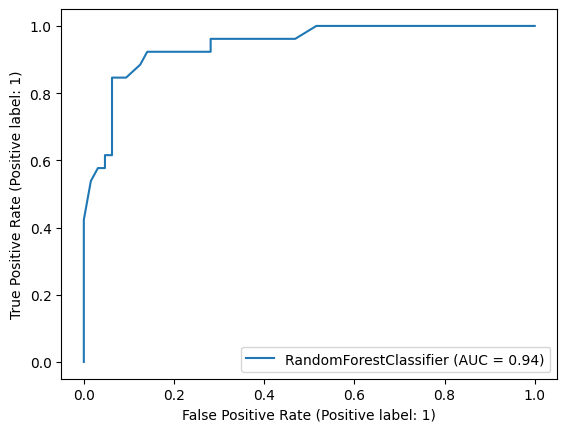

In [40]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [41]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9429086538461539

## XGBoost

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred = xgb_model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.76      0.85      0.80        26

    accuracy                           0.88        90
   macro avg       0.85      0.87      0.86        90
weighted avg       0.88      0.88      0.88        90



In [46]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

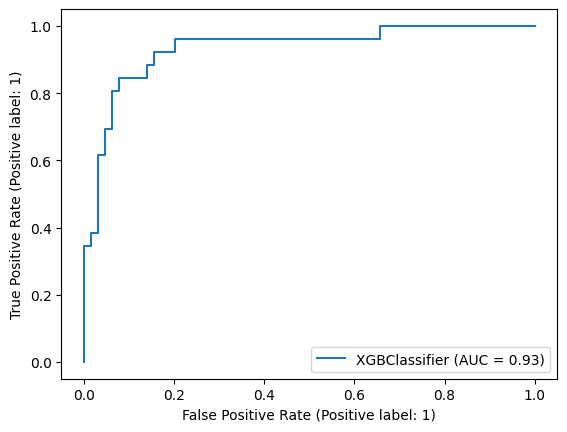

In [47]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.show()

In [48]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])

0.9338942307692308



---

